In [10]:
!cd ..

KeyError: 'AMatName'

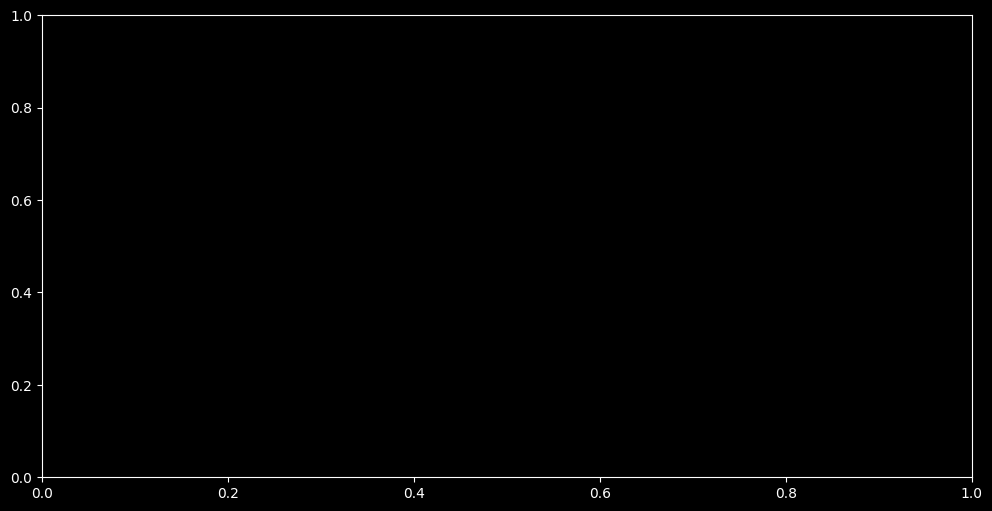

In [3]:
# Enhanced code integrating your approach with clarity and precision
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Reading data from the provided CSV file
df = pd.read_csv('/home/sambit.mishra/scratch/03_KERNELPERFORMANCE/tinymm-benchmarking/results/benchmarks.csv')

# Group by polynomial order and element type
grouped = df.groupby(['device', 'order', 'etype', 'n'])

# Define colors for mmtypes to maintain consistency
mmtypes = df['mmtype'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(mmtypes)))

# Iterate through each group to create and save bar plots
for (device, order, etype, n), group in grouped:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create groups based on 'AMatName'
    amatnames = group['AMatName'].unique()
    x = np.arange(len(amatnames))
    width = 0.13
    
    # Plot bars for each mmtype within each AMatName group
    for i, mmtype in enumerate(mmtypes):
        subset = group[group['mmtype'] == mmtype]
        ax.bar(x + i * width, subset['wtime'], width, label=mmtype, color=colors[i])

    # Titles and labels inspired by your provided code
    fig.suptitle(f'Benchmarking MM kernels found in P{order} {etype} elements on {device}', fontsize=16, fontweight='bold')
    ax.set_title(f'Iterations: 10, Number of B columns: {n}')
    ax.set_xlabel('Operator matrix name')
    ax.set_ylabel('Walltime (s)')
    ax.set_xticks(x + width * (len(mmtypes) / 2))
    ax.set_xticklabels(amatnames)

    # Legend below plot, outside plot area
    ax.legend(title='MMType', bbox_to_anchor=(0.5, -0.1), 
              loc='upper center', ncol=len(mmtypes))
    
    plt.tight_layout()
    plt.savefig(f'/home/sambit.mishra/scratch/03_KERNELPERFORMANCE/tinymm-benchmarking/results/p{order}-{etype}.png')
    plt.show()
    plt.close()


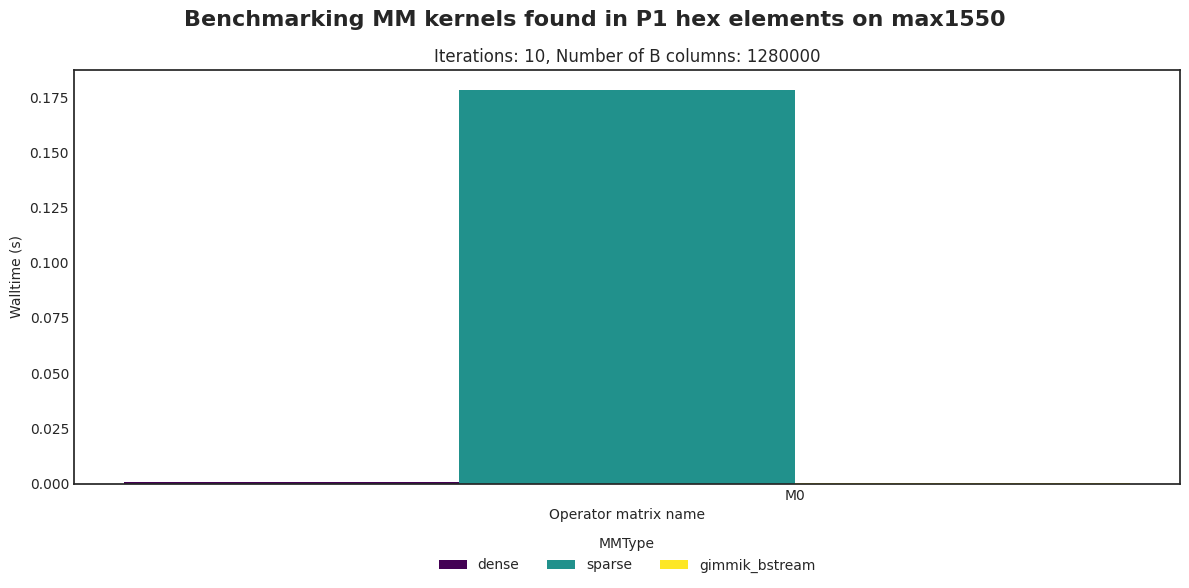

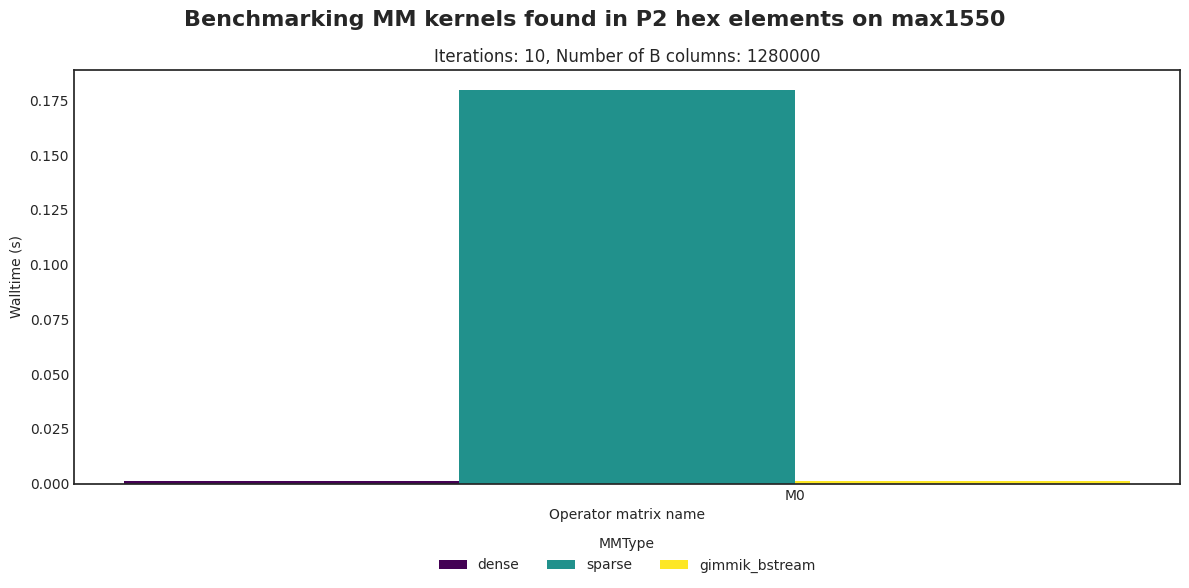

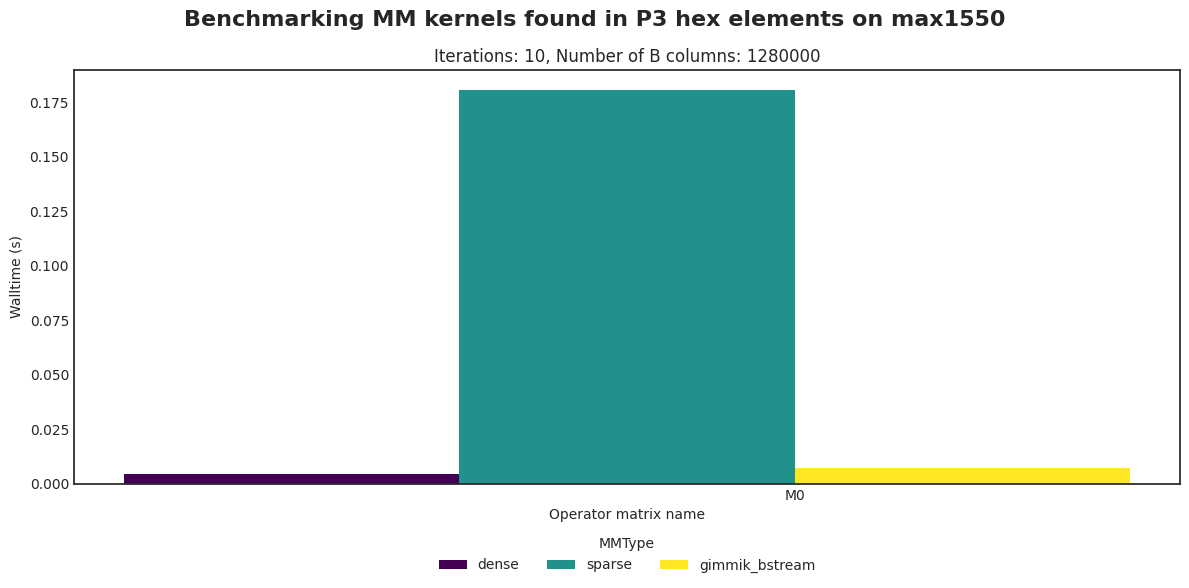

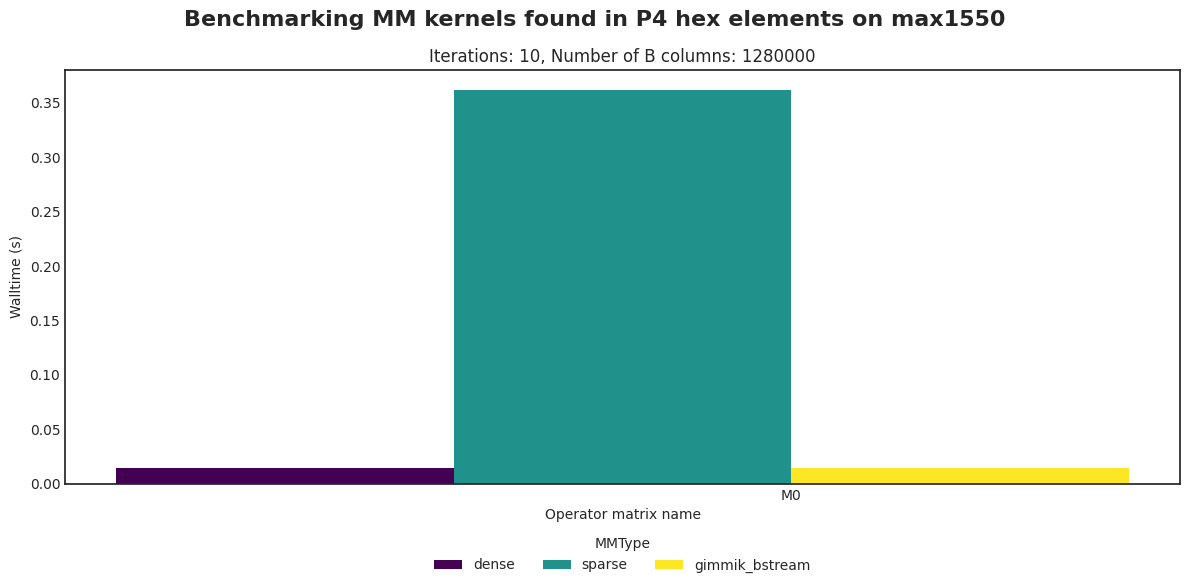

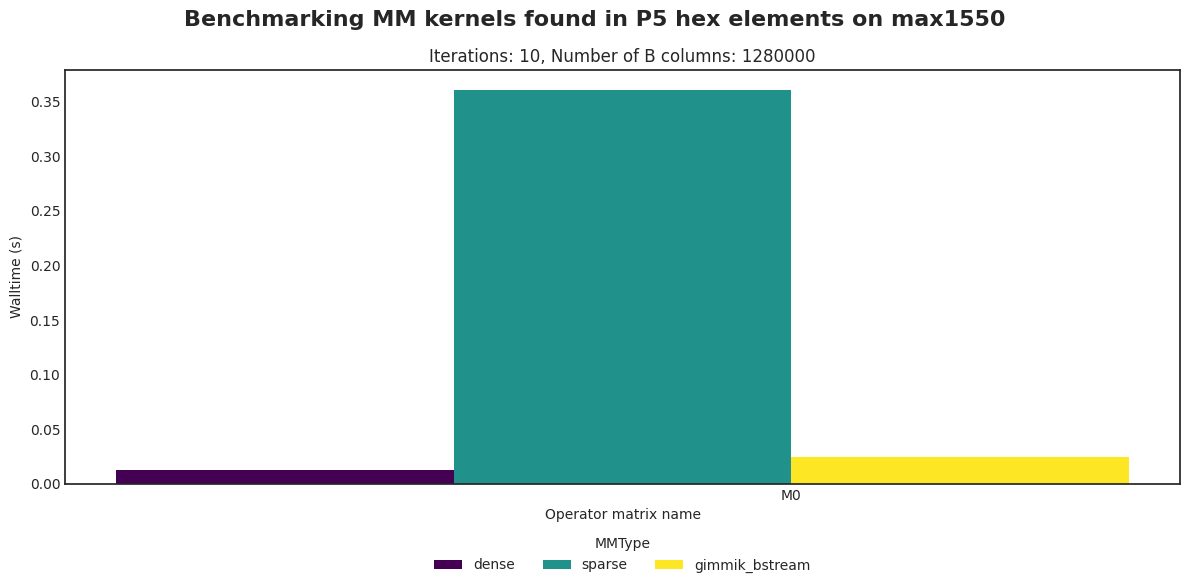

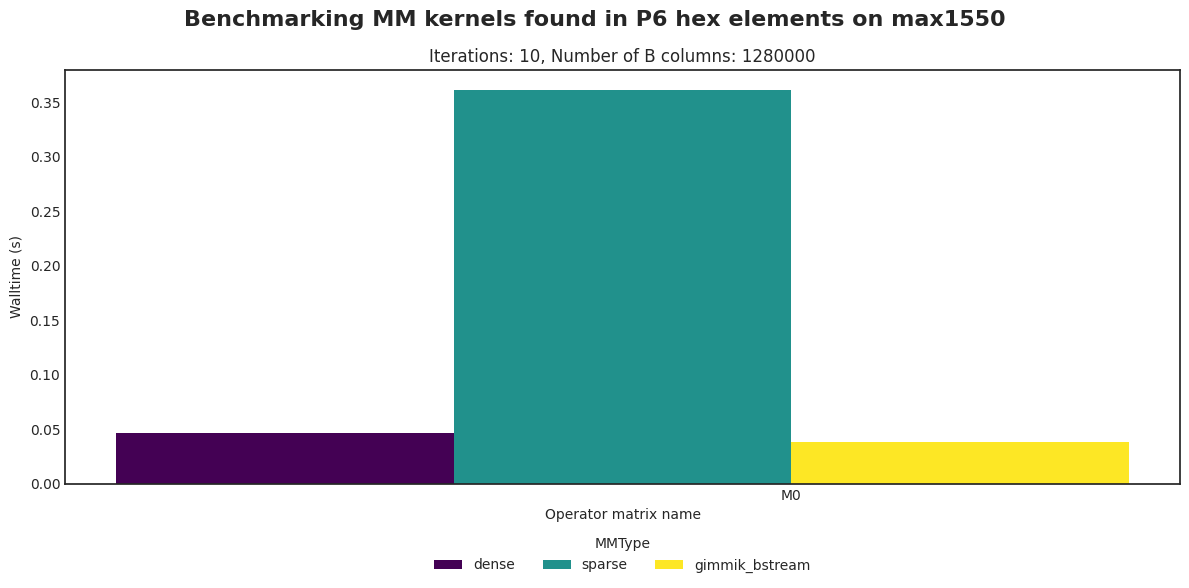

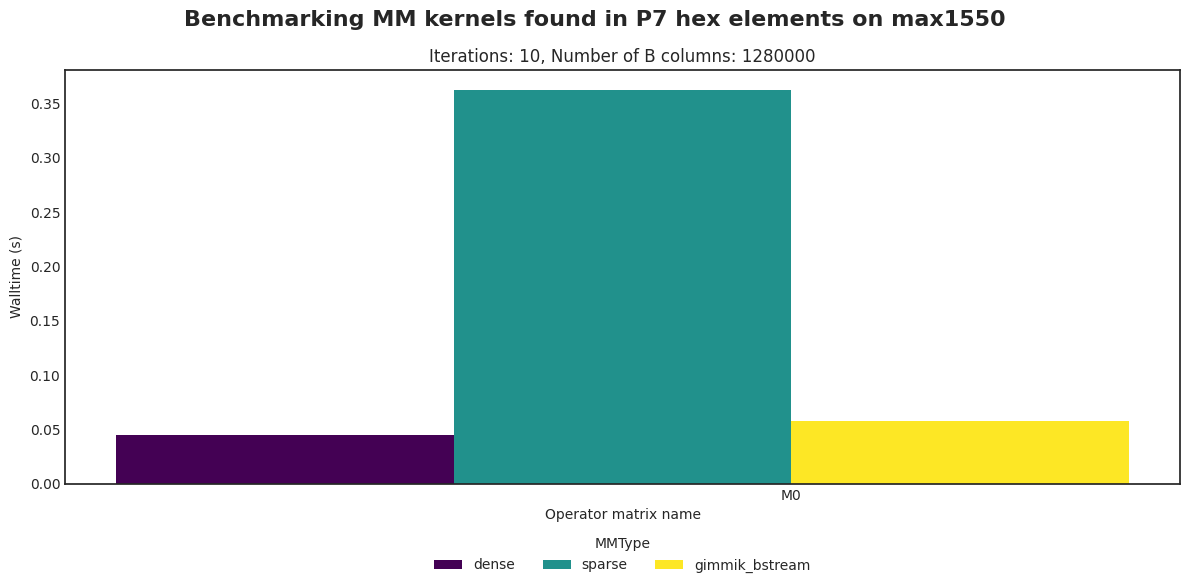

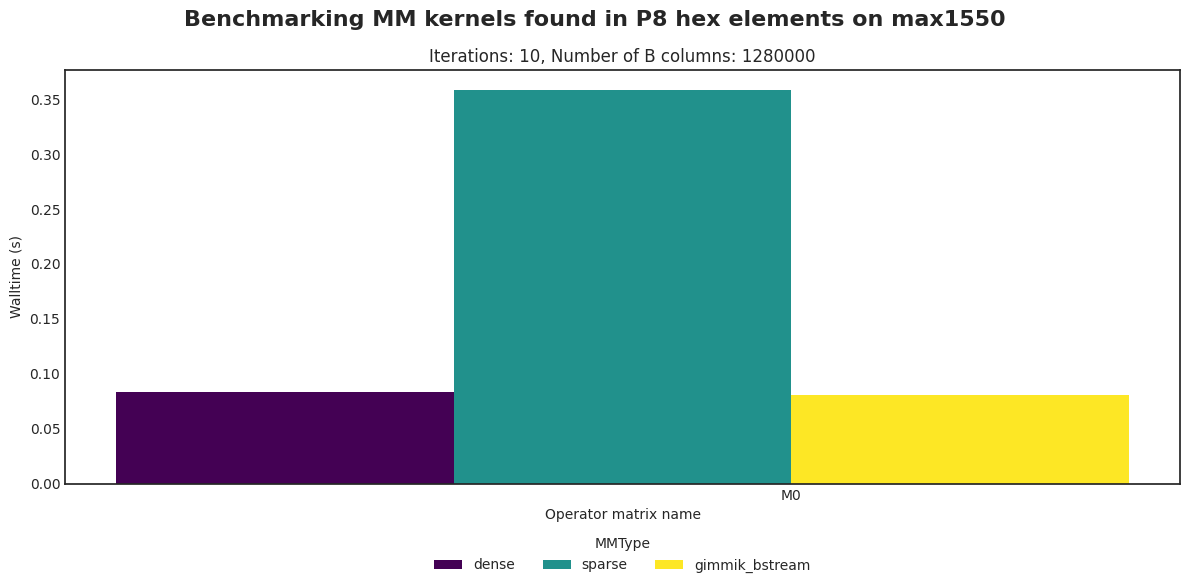

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use seaborn-whitegrid style and force white background
plt.style.use('seaborn-v0_8-white')
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'savefig.edgecolor': 'white'
})

# Reading data from the provided CSV file
df = pd.read_csv('/home/sambit.mishra/scratch/03_KERNELPERFORMANCE/tinymm-benchmarking/results/benchmarks.csv')

# Group by polynomial order and element type
grouped = df.groupby(['device', 'order', 'etype', 'n'])

# Define colors for mmtypes to maintain consistency
mmtypes = df['mmtype'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(mmtypes)))

# Iterate through each group to create and save bar plots
for (device, order, etype, n), group in grouped:
    # Create a figure with white background explicitly
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    # Create groups based on 'OpMat'
    amatnames = group['OpMat'].unique()
    x = np.arange(len(amatnames))
    width = 0.13

    # Plot bars for each mmtype within each AMatName group
    for i, mmtype in enumerate(mmtypes):
        subset = group[group['mmtype'] == mmtype]
        ax.bar(x + i * width, subset['wtime'], width, label=mmtype, color=colors[i])

    # Titles and labels
    fig.suptitle(f'Benchmarking MM kernels found in P{order} {etype} elements on {device}',
                 fontsize=16, fontweight='bold')
    ax.set_title(f'Iterations: 10, Number of B columns: {n}')
    ax.set_xlabel('Operator matrix name')
    ax.set_ylabel('Walltime (s)')
    ax.set_xticks(x + width * (len(mmtypes) / 2))
    ax.set_xticklabels(amatnames)

    # Legend below plot
    ax.legend(title='MMType', bbox_to_anchor=(0.5, -0.1), 
              loc='upper center', ncol=len(mmtypes))
    
    plt.tight_layout()
    plt.savefig(f'/home/sambit.mishra/scratch/03_KERNELPERFORMANCE/tinymm-benchmarking/results/max1550/p{order}-{etype}.png',
                facecolor='white', edgecolor='white')
    plt.show()
    plt.close()
